In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D  
#file = open("3D_spatial_network.txt",'r')
#from google.colab import files
#uploaded = files.upload()
# file = open("3D_spatial_network-Copy.csv",'r')

In [0]:
from google.colab import drive
drive.mount('/content/drive')
rootpath="/content/drive/My Drive/Colab Notebooks/3D_spatial_network - Copy.csv"
data=pd.read_csv(rootpath)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data
data= data.values

In [0]:
data

array([[1.44552912e+08, 9.34984860e+00, 5.67408757e+01, 1.70527716e+01],
       [1.44552912e+08, 9.35018840e+00, 5.67406785e+01, 1.76148402e+01],
       [1.44552912e+08, 9.35054850e+00, 5.67405445e+01, 1.80835356e+01],
       ...,
       [9.33232050e+07, 9.93500950e+00, 5.74992821e+01, 1.97331406e+01],
       [9.33232090e+07, 9.94347870e+00, 5.74959190e+01, 2.40270150e+01],
       [9.33232090e+07, 9.94345120e+00, 5.74962700e+01, 2.46352848e+01]])

In [0]:
#file = open("3D_spatial_network-Copy.csv",'r')
#dataset = file.read()
#temp=dataset.split("\n")



   
data=data[:,1:4]  
result=data[:,2:3]
data=data[:,0:2]

#Appending ones

In [0]:
data

array([[ 9.3498486, 56.7408757],
       [ 9.3501884, 56.7406785],
       [ 9.3505485, 56.7405445],
       ...,
       [ 9.9350095, 57.4992821],
       [ 9.9434787, 57.495919 ],
       [ 9.9434512, 57.49627  ]])

In [0]:
#Appending ones
data=np.append(arr=np.ones((len(data),1)),values=data,axis=1)#1
data=np.append(arr=data[:,1:2]*data[:,2:3],values=data,axis=1)#xy
data=np.append(arr=data[:,3:4]**2,values=data,axis=1)#y2
data=np.append(arr=data[:,3:4]**2,values=data,axis=1)#x2

data=np.append(arr=data[:,1:2]*data[:,5:6],values=data,axis=1)#y3
data=np.append(arr=data[:,2:3]*data[:,5:6],values=data,axis=1)#xy2
data=np.append(arr=data[:,2:3]*data[:,7:8],values=data,axis=1)#x2y
data=np.append(arr=data[:,3:4]*data[:,7:8],values=data,axis=1)#x3

data=np.append(arr=data[:,3:4]*data[:,9:10],values=data,axis=1)#y4
data=np.append(arr=data[:,4:5]*data[:,9:10],values=data,axis=1)#xy3
data=np.append(arr=data[:,6:7]*data[:,7:8],values=data,axis=1)#x2y2
data=np.append(arr=data[:,4:5]*data[:,11:12],values=data,axis=1)#x3y
data=np.append(arr=data[:,8:9]**2,values=data,axis=1)#x4

data=np.append(arr=data[:,8:9]*data[:,10:11],values=data,axis=1)#y5
data=np.append(arr=data[:,4:5]*data[:,15:16],values=data,axis=1)#xy4
data=np.append(arr=data[:,5:6]*data[:,15:16],values=data,axis=1)#x2y3
data=np.append(arr=data[:,4:5]*data[:,17:18],values=data,axis=1)#x3y2
data=np.append(arr=data[:,4:5]*data[:,18:19],values=data,axis=1)#x4y
data=np.append(arr=data[:,10:11]*data[:,14:15],values=data,axis=1)#x5

data=np.append(arr=data[:,14:15]**2,values=data,axis=1)#y6
data=np.append(arr=data[:,5:6]*data[:,21:22],values=data,axis=1)#xy5
data=np.append(arr=data[:,5:6]*data[:,22:23],values=data,axis=1)#x2y4
data=np.append(arr=data[:,5:6]*data[:,23:24],values=data,axis=1)#x3y3
data=np.append(arr=data[:,5:6]*data[:,24:25],values=data,axis=1)#x4y2
data=np.append(arr=data[:,5:6]*data[:,25:26],values=data,axis=1)#x5y
data=np.append(arr=data[:,25:26]**6,values=data,axis=1)#x6

In [0]:
traindata,testdata,trainresult,testresult=train_test_split(data,result,test_size=0.3)
len_of_terms=28
le=len_of_terms

avg=[0]*le
std=[0]*le
for i in range(0,le):
    avg[i]=np.mean(traindata[:,i:i+1])
    std[i]=np.std(traindata[:,i:i+1])
    if std[i]!=0:
        traindata[:,i]=(traindata[:,i]-avg[i])/std[i]
        testdata[:,i]=(testdata[:,i]-avg[i])/std[i]

for i in range(0,1):
    avg[i]=np.mean(trainresult[:,i:i+1])
    std[i]=np.std(trainresult[:,i:i+1])
    if std[i]!=0:
        trainresult[:,i]=(trainresult[:,i]-avg[i])/std[i]
        testresult[:,i]=(testresult[:,i]-avg[i])/std[i]

In [0]:
y_bar=0
for i in range(0,len(trainresult[:,0])):
    y_bar+=trainresult[i][0]
aa=np.std(trainresult[:,0])
y_bar/=len(trainresult[:,0])
sst=0
for i in range(0,len(trainresult[:,0])):
    sst+=(trainresult[i][0]-y_bar)**2
sst/=2
 
w=np.empty((1,le))
w.fill(0)
   #best-0.000002
error_per_iteration=np.zeros((300,1))

In [0]:
w=[[-2.14051431e-01, -1.39833491e-01, -7.01647753e-02, -6.59920891e-03,
   4.52173885e-02,  7.58236685e-02 ,-4.11915145e-02, -1.37142418e-01,
  -6.69016174e-02 ,-2.54828633e-03 , 5.04979264e-02 , 8.42457042e-02,
  -4.24568536e-02, -6.34953869e-02 , 1.56543775e-03 , 5.60708018e-02,
   9.34737231e-02, -4.37379643e-02 , 5.79776037e-03 , 6.19384940e-02,
   1.03532087e-01 ,-4.50346962e-02 , 6.80999582e-02 ,-4.63468971e-02,
   1.14415525e-01 ,-2.01943505e-16,  1.26075087e-01 ,-4.76744141e-02]]
w=np.array(w)
print(w)

[[-2.14051431e-01 -1.39833491e-01 -7.01647753e-02 -6.59920891e-03
   4.52173885e-02  7.58236685e-02 -4.11915145e-02 -1.37142418e-01
  -6.69016174e-02 -2.54828633e-03  5.04979264e-02  8.42457042e-02
  -4.24568536e-02 -6.34953869e-02  1.56543775e-03  5.60708018e-02
   9.34737231e-02 -4.37379643e-02  5.79776037e-03  6.19384940e-02
   1.03532087e-01 -4.50346962e-02  6.80999582e-02 -4.63468971e-02
   1.14415525e-01 -2.01943505e-16  1.26075087e-01 -4.76744141e-02]]


In [0]:
lamda=0.002
eta=1e-7
for iterate in range(278,300):
    print(iterate)
    print(w)
    sum_w=np.zeros((1,le))
    for row in range(0,len(traindata)):
        
        for j in range(0,le):
            sum_w[0][j]+=(traindata[row][j]*((np.dot(traindata[row],w.T))-trainresult[row][0]))
        
        for i in range(0,le):
                if w[0][i]>0:
                    sum_w[0][i]+=2*lamda*w[0][i]
                else:
                    sum_w[0][i]-=2*lamda*w[0][i]
        

    for j in range(0,le):
        w[0][j]-=eta*(sum_w[0][j])

    
    error_sum=0
    for row in range(0,len(traindata)):
        error_sum+=(((np.dot(traindata[row],w.T))-trainresult[row][0])**2)
    error_sum/=2
    print(error_sum)
    error_per_iteration[iterate]=error_sum
    sse=error_sum
    r2=1-(sse/sst)
    print(r2)
    print("\n")

278
[[-2.05390854e-01 -1.34207957e-01 -6.73515122e-02 -6.32592034e-03
   4.35570790e-02  7.29192575e-02 -4.08686829e-02 -1.31575600e-01
  -6.41646814e-02 -2.37673133e-03  4.87187452e-02  8.11378452e-02
  -4.20580380e-02 -6.08401626e-02  1.63684371e-03  5.41637347e-02
   9.01399481e-02 -4.32622772e-02  5.77524947e-03  5.98942812e-02
   9.99491755e-02 -4.44812583e-02  6.59091769e-02 -4.57148379e-02
   1.10560308e-01 -2.36877847e-16  1.21925633e-01 -4.69628715e-02]]
[144222.00045168]
[0.05245211]


279
[[-2.05809718e-01 -1.34480390e-01 -6.74881341e-02 -6.33974615e-03
   4.36372511e-02  7.30600893e-02 -4.08845505e-02 -1.31845136e-01
  -6.42975547e-02 -2.38557881e-03  4.88047636e-02  8.12886472e-02
  -4.20775092e-02 -6.09690278e-02  1.63289486e-03  5.42560361e-02
   9.03018113e-02 -4.32853943e-02  5.77592703e-03  5.99933139e-02
   1.00123227e-01 -4.45080631e-02  6.60153965e-02 -4.57453718e-02
   1.10747670e-01 -2.34922811e-16  1.22127367e-01 -4.69971755e-02]]
[144216.12770036]
[0.05249069]


In [0]:
error_per_iteration


array([[     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [     0.        ],
       [    

In [0]:
error_per_iteration=[[150961.8491118 ],
       [150153.81404614],
       [149623.05362992],
       [149268.98142121],
       [149027.59247719],
       [148858.10189662],
       [148734.53127011],
       [148640.32375557],
       [148564.93119042],
       [148501.63211071],
       [148446.14429505],
       [148395.73908675],
       [148348.67788531],
       [148303.85245841],
       [148260.55628082],
       [148218.33885515],
       [148176.91239574],
       [148136.09329067],
       [148095.76362177],
       [148055.84784966],
       [147918.18908704],
       [147784.2739138 ],
       [147653.7295674 ],
       [147526.45149765],
       [147402.35765559],
       [147281.36747398],
       [147163.40956705],
       [147048.40121031],
       [147113.93366298],
       [147065.00353803],
       [147016.58450453],
       [146968.70525709],
       [146921.31972204],
       [146874.47036212],
       [146828.09527156],
       [146782.25597064],
       [146736.86859851],
       [146692.0210441 ],
       [146647.59907432],
       [146603.72704736],
       [146560.24880084],
       [146517.33911403],
       [146474.78399583],
       [146432.82809574],
       [146391.17789452],
       [146350.17459765],
       [146309.41560536],
       [146269.37566045],
       [146229.50293218],
       [146190.45695822],
       [146151.48234711],
       [146113.49464203],
       [146075.46175029],
       [146038.65447322],
       [146001.66620802],
       [145966.26195703],
       [145930.53097171],
       [145896.92807504],
       [145862.86864269],
       [145831.77475152],
       [145800.16948972],
       [145772.83925076],
       [145745.14059816],
       [145723.79927865],
       [145702.67363563],
       [145691.27331031],
       [145681.58422051],
       [145625.47264336],
       [145603.32442881],
       [145592.03784094],
       [145583.48512625],
       [145575.64135728],
       [145567.99691775],
       [145560.42101368],
       [145552.87882339],
       [145545.36046358],
       [145537.86283378],
       [145530.38482131],
       [145522.92596025],
       [145515.48602252],
       [145508.0648778 ],
       [145500.66243933],
       [145493.2786408 ],
       [145485.91342579],
       [145478.56674286],
       [145471.23854303],
       [145463.92877862],
       [145456.63740265],
       [145449.36436856],
       [145442.10963003],
       [145434.87314094],
       [145427.65485533],
       [145420.45472736],
       [145413.27271132],
       [145406.10876161],
       [145398.96283275],
       [145391.83487938],
       [145384.72485627],
       [145377.63271828],
       [145370.55842039],
       [145363.50191768],
       [145356.46316538],
       [145349.4421188 ],
       [145342.43873338],
       [145335.45296465],
       [145328.48476827],
       [145321.53410001],
       [145314.60091576],
       [145307.68517148],
       [145300.7868233 ],
       [145293.90582742],
       [145287.04214015],
       [145280.19571793],
       [145273.36651731],
       [145266.55449491],
       [145259.75960752],
       [145252.98181199],
       [145246.22106529],
       [145239.4773245 ],
       [145232.75054684],
       [145226.04068958],
       [145219.34771014],
       [145212.67156601],
       [145206.01221484],
       [145199.36961434],
       [145192.74372234],
       [145186.13449679],
       [145179.54189572],
       [145172.96587729],
       [145166.40639975],
       [145159.86342146],
       [145153.33690088],
       [145146.82679659],
       [145140.33306725],
       [145133.85567165],
       [145127.39456865],
       [145120.94971725],
       [145114.52107654],
       [145108.10860569],
       [145101.71226401],
       [145095.33201088],
       [145043.5936036 ],
       [145036.2641331 ],
       [145028.96266242],
       [145021.68394772],
       [145014.42767049],
       [145007.19386356],
       [144999.98241788],
       [144992.79313096],
       [144985.62577095],
       [144978.4801093 ],
       [144971.35593348],
       [144964.25305028],
       [144957.17128545],
       [144950.11048186],
       [144943.07049728],
       [144936.05120242],
       [144929.05247891],
       [144922.07421779],
       [144915.11631801],
       [144908.17868527],
       [144901.26123102],
       [144894.36387161],
       [144887.48652749],
       [144880.6291227 ],
       [144873.79158425],
       [144866.97384175],
       [144860.17582702],
       [144853.39747373],
       [144846.63871721],
       [144839.89949418],
       [144833.17974254],
       [144826.47940128],
       [144819.79841025],
       [144813.13671011],
       [144806.49424225],
       [144799.87094863],
       [144793.26677176],
       [144786.68165465],
       [144780.11554072],
       [144773.56837382],
       [144767.04009812],
       [144760.53065813],
       [144754.03999864],
       [144747.56806476],
       [144741.1148018 ],
       [144734.68015535],
       [144728.26407124],
       [144721.86649548],
       [144715.48737432],
       [144709.12665418],
       [144702.78428169],
       [144696.46020368],
       [144690.15436712],
       [144683.8667192 ],
       [144677.59720725],
       [144671.34577878],
       [144665.11238146],
       [144658.89696315],
       [144652.69947184],
       [144646.51985569],
       [144640.35806301],
       [144634.21404229],
       [144628.08774214],
       [144621.97911135],
       [144615.88809884],
       [144609.81465371],
       [144603.75872519],
       [144603.00235479],
       [144596.21215883],
       [144589.44399241],
       [144582.69778394],
       [144575.97346203],
       [144569.27095557],
       [144562.59019363],
       [144555.93110555],
       [144549.29362092],
       [144542.67766949],
       [144536.0831813 ],
       [144571.04913641],
       [144564.63383984],
       [144558.24220318],
       [144551.87236274],
       [144545.52365912],
       [144539.19578907],
       [144532.88857222],
       [144526.60187603],
       [144520.33558935],
       [144514.08961247],
       [144507.86385295],
       [144501.65822366],
       [144495.47264158],
       [144489.30702707],
       [144483.16130333],
       [144477.03539582],
       [144470.92923206],
       [144464.84274119],
       [144458.77585377],
       [144452.72850163],
       [144446.70061758],
       [144440.69213537],
       [144434.70298952],
       [144428.73311526],
       [144422.78244838],
       [144416.85092526],
       [144410.93848273],
       [144405.04505804],
       [144399.17058887],
       [144393.31501326],
       [144387.47826954],
       [144381.6602964 ],
       [144375.86103281],
       [144370.080418  ],
       [144369.43871049],
       [144363.03933159],
       [144356.66281446],
       [144350.30907683],
       [144343.97803682],
       [144337.66961288],
       [144331.3837238 ],
       [144325.1202887 ],
       [144318.879227  ],
       [144312.66045845],
       [144306.4639031 ],
       [144300.28948132],
       [144294.13711375],
       [144288.00672135],
       [144281.89822537],
       [144275.81154735],
       [144269.74660911],
       [144263.70333276],
       [144257.68164071],
       [144251.68145563],
       [144245.70270049],
       [144239.74529852],
       [144233.80917326],
       [144227.89424848],
       [144222.00044826],
       [144222.00045168],
       [144216.12770036],
       [144210.27592256],
       [144204.44504317],
       [144198.63498736],
       [144192.84568054],
       [144187.07704841],
       [144181.32901695],
       [144175.60151237],
       [144169.89446115],
       [144164.20779007],
       [144158.54142614],
       [144152.89529664],
       [144147.26932911],
       [144141.66345134],
       [144136.0775914 ],
       [144130.51167761],
       [144124.96563852],
       [144119.43940298],
       [144113.93290006],
       [144108.4460591 ],
       [144102.9788097 ]]
error_per_iteration=np.array(error_per_iteration)
print(error_per_iteration)

[[150961.8491118 ]
 [150153.81404614]
 [149623.05362992]
 [149268.98142121]
 [149027.59247719]
 [148858.10189662]
 [148734.53127011]
 [148640.32375557]
 [148564.93119042]
 [148501.63211071]
 [148446.14429505]
 [148395.73908675]
 [148348.67788531]
 [148303.85245841]
 [148260.55628082]
 [148218.33885515]
 [148176.91239574]
 [148136.09329067]
 [148095.76362177]
 [148055.84784966]
 [147918.18908704]
 [147784.2739138 ]
 [147653.7295674 ]
 [147526.45149765]
 [147402.35765559]
 [147281.36747398]
 [147163.40956705]
 [147048.40121031]
 [147113.93366298]
 [147065.00353803]
 [147016.58450453]
 [146968.70525709]
 [146921.31972204]
 [146874.47036212]
 [146828.09527156]
 [146782.25597064]
 [146736.86859851]
 [146692.0210441 ]
 [146647.59907432]
 [146603.72704736]
 [146560.24880084]
 [146517.33911403]
 [146474.78399583]
 [146432.82809574]
 [146391.17789452]
 [146350.17459765]
 [146309.41560536]
 [146269.37566045]
 [146229.50293218]
 [146190.45695822]
 [146151.48234711]
 [146113.49464203]
 [146075.461

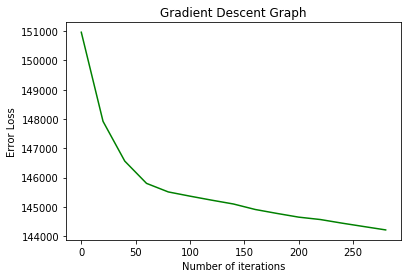

In [0]:
store_err=error_per_iteration
#err=error_per_iteration[:300,:]
err=[error_per_iteration[i*20] for i in range(0,15)]
iteration_num = [(i*20) for i in range(0,15)]
plt.plot(iteration_num,err, color='g')
plt.xlabel('Number of iterations')
plt.ylabel('Error Loss')
plt.title('Gradient Descent Graph')
plt.show()

In [0]:
err

NameError: ignored

In [0]:
X_train=traindata
X_test=testdata
Y_train=trainresult
Y_test=testresult
w=w.T

predict=np.zeros((1,len(X_train)))
for row in range(0,len(X_train)):
    predict[0][row]=(np.dot(X_train[row],w))
predict=np.transpose(predict)

y_bar=0
for i in range(0,len(Y_train[:,0])):
    y_bar+=Y_train[i][0]
sst=0
for i in range(0,len(Y_train[:,0])):
    sst+=(Y_train[i][0]-y_bar)**2
sst/=2

sse=0
for i in range(0,len(Y_train[:,0])):
    sse+=(Y_train[i][0]-predict[i][0])**2
sse/=2
r2=1-(sse/sst)
print(r2)
print("\n")


rms=(sse/len(Y_train[:,0]))**0.5

print(rms)
print("\n")

0.053996924802647506


0.687751072408237


